In [1]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
# Load the data and scale it
X, y = load_iris(return_X_y=True)
X = StandardScaler().fit_transform(X)
print(f'The number of dimensions in X is {X.shape[1]}')

The number of dimensions in X is 4


In [3]:
# Load PCA and specify the number of dimensions aka components
pca = PCA(n_components=2)
pc = pca.fit_transform(X)
print(f'The number of reduced dimensions is {pc.shape[1]}')

The number of reduced dimensions is 2


In [4]:
# Put the data into a pandas data frame
df = pd.DataFrame(data = pc, columns = ['pc_1', 'pc_2'])
df['target'] = y

In [5]:
df.head()

,pc_1,pc_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


In [6]:
# Recode the numerical data to categorical
def recoding(data):
    if data == 0:
        return 'iris-setosa'
    elif data == 1:
        return 'iris-versicolor'
    else:
        return 'iris-virginica'
    
df['target'] = df['target'].apply(recoding)
df.head()

,pc_1,pc_2,target
0,-2.264703,0.480027,iris-setosa
1,-2.080961,-0.674134,iris-setosa
2,-2.364229,-0.341908,iris-setosa
3,-2.299384,-0.597395,iris-setosa
4,-2.389842,0.646835,iris-setosa


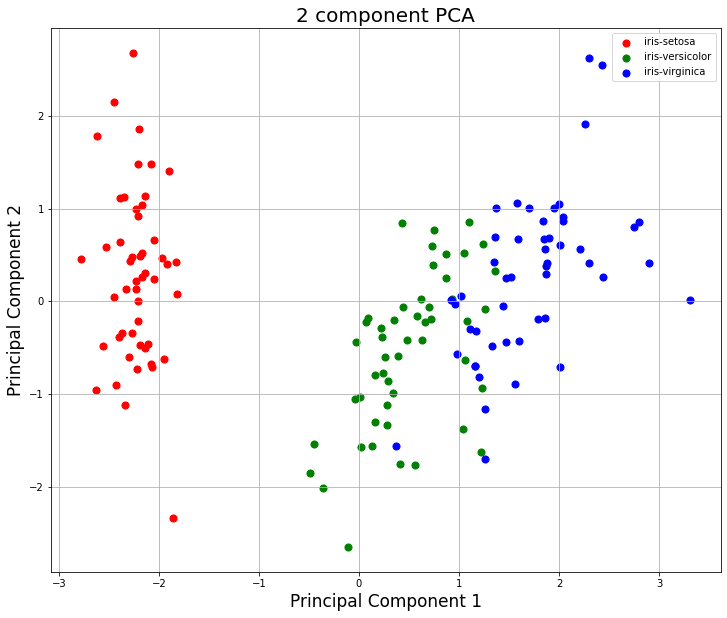

In [7]:
# Plot the data
fig = plt.figure(figsize = (12,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 17)
ax.set_ylabel('Principal Component 2', fontsize = 17)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['iris-setosa', 'iris-versicolor', 'iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = df['target'] == target
    ax.scatter(df.loc[indicesToKeep, 'pc_1'],
               df.loc[indicesToKeep, 'pc_2'],
               c = color,
               s = 50)
ax.legend(targets)
ax.grid()